# Imports

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import permutation_importance

# load data

In [183]:
df = pd.read_csv("combined.csv", low_memory=False)

In [184]:
df.head()

,Unnamed: 0,response,engagement_type,Condition,wave,item,real,education,ResponseId,age,gender,ethnicity,DemRep_C,diglitagg,concord,college,both,republican,veracity,order
0,1,1,Accuracy,1,1,w1_30,0,7.0,R1_R_2PhCp3E1HttHgJX,43,1,1,6.0,-0.015806,NaN,True,0,6.0,0,0.0
1,2,0,Accuracy,1,1,w1_30,0,2.0,R1_R_1oz44sJpEx0bT7J,50,2,1,4.0,1.126556,NaN,False,0,4.0,0,0.0
2,3,0,Accuracy,1,1,w1_30,0,5.0,R1_R_1eE3lui886vwdRm,19,2,2,3.0,-0.307495,NaN,False,0,3.0,0,0.0
3,4,1,Accuracy,1,1,w1_30,0,7.0,R1_R_dht0sqrA4qzIWkx,34,1,1,2.0,0.633818,NaN,True,0,2.0,0,0.0
4,5,1,Accuracy,1,1,w1_30,0,3.0,R1_R_1gjr4KvB3FAV2z4,30,2,2,1.0,-1.192447,NaN,False,0,1.0,0,0.0


In [185]:
df.rename(columns={df.columns[0] : "ID"}, inplace=True)
df.set_index("ID", inplace=True)
df.head()

,response,engagement_type,Condition,wave,item,real,education,ResponseId,age,gender,ethnicity,DemRep_C,diglitagg,concord,college,both,republican,veracity,order
ID,,,,,,,,,,,,,,,,,,,
1,1,Accuracy,1,1,w1_30,0,7.0,R1_R_2PhCp3E1HttHgJX,43,1,1,6.0,-0.015806,NaN,True,0,6.0,0,0.0
2,0,Accuracy,1,1,w1_30,0,2.0,R1_R_1oz44sJpEx0bT7J,50,2,1,4.0,1.126556,NaN,False,0,4.0,0,0.0
3,0,Accuracy,1,1,w1_30,0,5.0,R1_R_1eE3lui886vwdRm,19,2,2,3.0,-0.307495,NaN,False,0,3.0,0,0.0
4,1,Accuracy,1,1,w1_30,0,7.0,R1_R_dht0sqrA4qzIWkx,34,1,1,2.0,0.633818,NaN,True,0,2.0,0,0.0
5,1,Accuracy,1,1,w1_30,0,3.0,R1_R_1gjr4KvB3FAV2z4,30,2,2,1.0,-1.192447,NaN,False,0,1.0,0,0.0


# missing value

In [186]:
df.isnull().sum()

response               0
engagement_type        0
Condition              0
wave                   0
item                   0
real                   0
education            908
ResponseId             0
age                    0
gender                 0
ethnicity              0
DemRep_C           18500
diglitagg          19119
concord            42500
college              908
both                   0
republican         18500
veracity               0
order                  0
dtype: int64

In [187]:
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['DemRep_C'].fillna(df['DemRep_C'].mean(), inplace=True)
df['diglitagg'].fillna(df['diglitagg'].mean(), inplace=True)
df['concord'].fillna(df['concord'].mean(), inplace=True)
df['college'].fillna(df['college'].mode()[0], inplace=True)
df['republican'].fillna(df['republican'].mean(), inplace=True)

df.isnull().sum()

response           0
engagement_type    0
Condition          0
wave               0
item               0
real               0
education          0
ResponseId         0
age                0
gender             0
ethnicity          0
DemRep_C           0
diglitagg          0
concord            0
college            0
both               0
republican         0
veracity           0
order              0
dtype: int64

In [188]:
df.head()

,response,engagement_type,Condition,wave,item,real,education,ResponseId,age,gender,ethnicity,DemRep_C,diglitagg,concord,college,both,republican,veracity,order
ID,,,,,,,,,,,,,,,,,,,
1,1,Accuracy,1,1,w1_30,0,7.0,R1_R_2PhCp3E1HttHgJX,43,1,1,6.0,-0.015806,0.006494,True,0,6.0,0,0.0
2,0,Accuracy,1,1,w1_30,0,2.0,R1_R_1oz44sJpEx0bT7J,50,2,1,4.0,1.126556,0.006494,False,0,4.0,0,0.0
3,0,Accuracy,1,1,w1_30,0,5.0,R1_R_1eE3lui886vwdRm,19,2,2,3.0,-0.307495,0.006494,False,0,3.0,0,0.0
4,1,Accuracy,1,1,w1_30,0,7.0,R1_R_dht0sqrA4qzIWkx,34,1,1,2.0,0.633818,0.006494,True,0,2.0,0,0.0
5,1,Accuracy,1,1,w1_30,0,3.0,R1_R_1gjr4KvB3FAV2z4,30,2,2,1.0,-1.192447,0.006494,False,0,1.0,0,0.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182468 entries, 1 to 182468
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   response         182468 non-null  int64  
 1   engagement_type  182468 non-null  object 
 2   Condition        182468 non-null  int64  
 3   wave             182468 non-null  int64  
 4   item             182468 non-null  object 
 5   real             182468 non-null  int64  
 6   education        182468 non-null  float64
 7   ResponseId       182468 non-null  object 
 8   age              182468 non-null  int64  
 9   gender           182468 non-null  int64  
 10  ethnicity        182468 non-null  int64  
 11  DemRep_C         182468 non-null  float64
 12  diglitagg        182468 non-null  float64
 13  concord          182468 non-null  float64
 14  college          182468 non-null  bool   
 15  both             182468 non-null  int64  
 16  republican       182468 non-null  float64
 

In [190]:
df.describe()

,response,Condition,wave,real,education,age,gender,ethnicity,DemRep_C,diglitagg,concord,both,republican,veracity,order
count,182468.000000,182468.000000,182468.000000,182468.000000,182468.000000,182468.000000,182468.000000,182468.000000,182468.000000,1.824680e+05,182468.000000,182468.000000,182468.000000,182468.000000,182468.000000
mean,0.344745,2.893916,1.849365,0.485532,4.754483,44.679374,1.559282,2.467677,3.341073,-1.310743e-16,0.006494,0.658713,3.341073,0.485532,0.000329
std,0.475286,0.971170,0.357693,0.499792,1.995839,17.059225,0.496475,3.809966,1.635109,9.461575e-01,0.437880,0.474143,1.635109,0.499792,0.405807
min,0.000000,1.000000,1.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,-2.804850e+00,-0.500000,0.000000,1.000000,0.000000,-0.500000
25%,0.000000,2.000000,2.000000,0.000000,3.000000,30.000000,1.000000,1.000000,2.000000,-6.151279e-01,-0.500000,0.000000,2.000000,0.000000,-0.500000
50%,0.000000,3.000000,2.000000,0.000000,5.000000,43.000000,2.000000,1.000000,3.341073,-1.348017e-16,0.006494,1.000000,3.341073,0.000000,0.000000
75%,1.000000,4.000000,2.000000,1.000000,6.000000,59.000000,2.000000,2.000000,5.000000,5.755421e-01,0.500000,1.000000,5.000000,1.000000,0.500000
max,1.000000,4.000000,2.000000,1.000000,11.000000,93.000000,2.000000,16.000000,6.000000,2.978026e+00,0.500000,1.000000,6.000000,1.000000,0.500000


## Age distribution

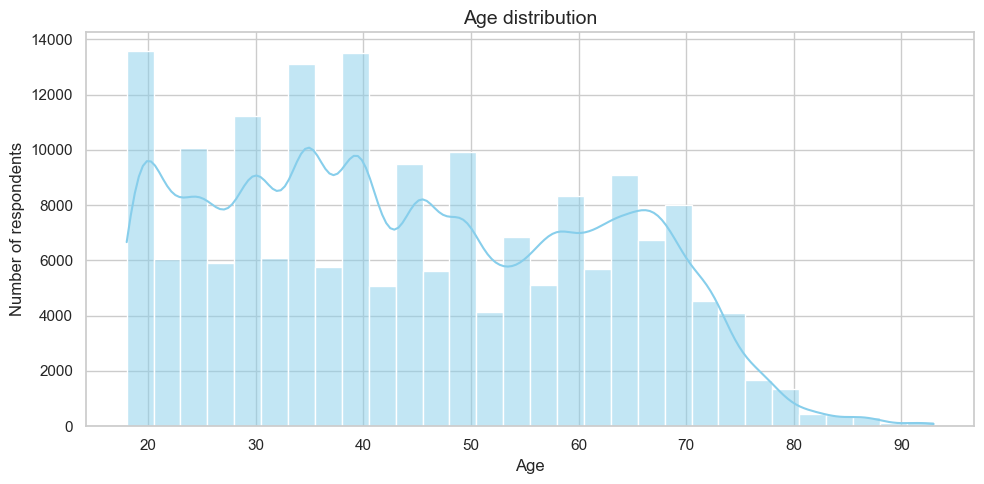

In [191]:
eda_df = df.copy()

sns.set(style="whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14

plt.figure(figsize=(10, 5))
sns.histplot(eda_df["age"], bins=30, kde=True, color='skyblue')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of respondents")
plt.tight_layout()
plt.show()

## Education distribution

C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\1901664484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data=eda_df, palette="viridis")


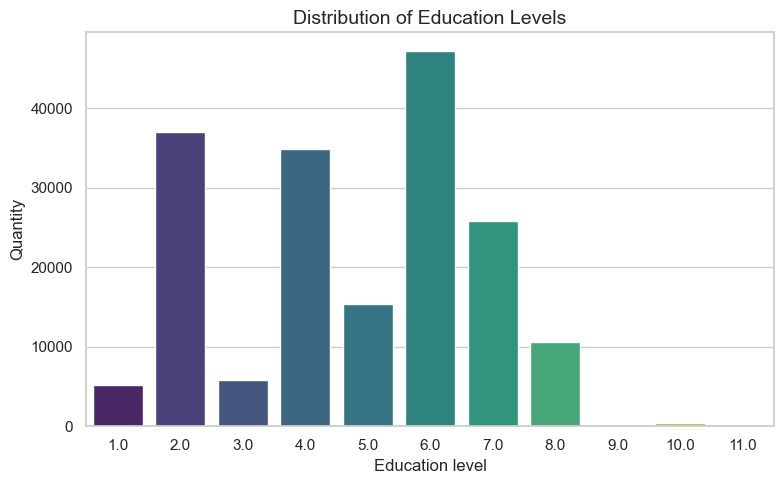

In [192]:
plt.figure(figsize=(8, 5))
sns.countplot(x="education", data=eda_df, palette="viridis")
plt.title("Distribution of Education Levels")
plt.xlabel("Education level")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

## Rate of correct responses by main variables

### Correct response rate by type of engagement

In [193]:
engagement_accuracy = df.groupby("engagement_type")["response"].mean().reset_index()
engagement_accuracy

,engagement_type,response
0,Accuracy,0.398375
1,Commenting,0.333265
2,Liking,0.311182
3,Sharing,0.325333


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\1243894735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_accuracy, x="engagement_type", y="response", palette="Blues_d")


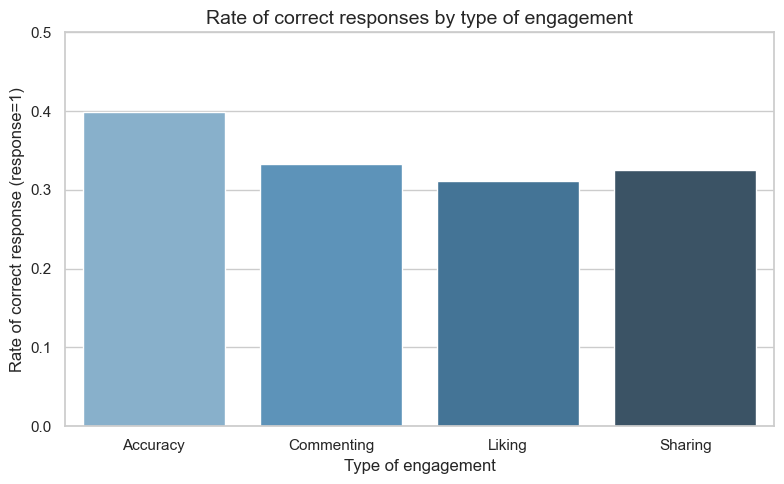

In [194]:
plt.figure(figsize=(8, 5))
sns.barplot(data=engagement_accuracy, x="engagement_type", y="response", palette="Blues_d")
plt.title("Rate of correct responses by type of engagement")
plt.ylabel("Rate of correct response (response=1)")
plt.xlabel("Type of engagement")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

### Average response by DemRep_C

In [195]:
political_alignment = df.groupby("DemRep_C")["response"].mean().reset_index()
political_alignment

,DemRep_C,response
0,1.000000,0.407621
1,2.000000,0.363744
2,3.000000,0.252141
3,3.341073,0.373568
4,4.000000,0.235486
5,5.000000,0.386511
6,6.000000,0.424124


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\20195495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=political_alignment, x="DemRep_C", y="response", palette="Blues_d")


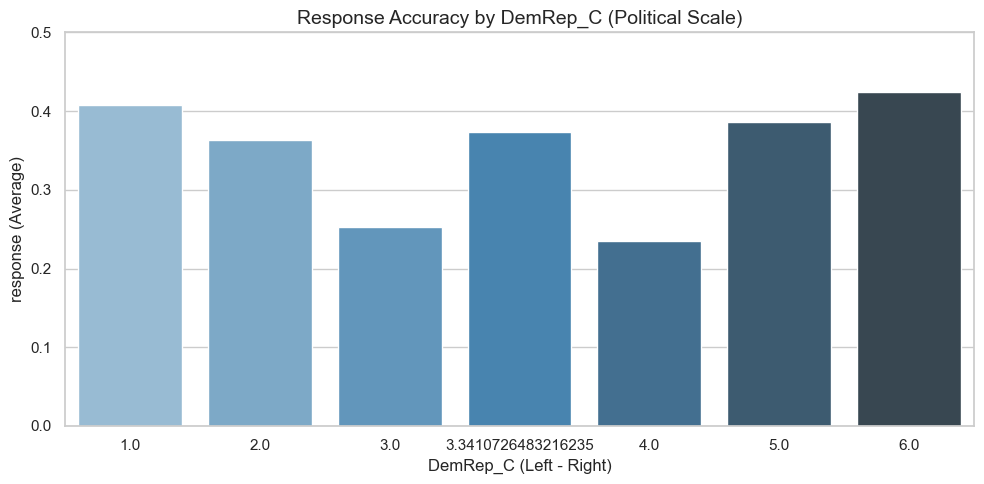

In [196]:
plt.figure(figsize=(10, 5))
sns.barplot(data=political_alignment, x="DemRep_C", y="response", palette="Blues_d")
plt.title("Response Accuracy by DemRep_C (Political Scale)")
plt.xlabel("DemRep_C (Left - Right)")
plt.ylabel("response (Average)")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

### Average response by level of repurchase

In [197]:
republican_alignment = df.groupby("republican")["response"].mean().reset_index()
republican_alignment

,republican,response
0,1.000000,0.407621
1,2.000000,0.363744
2,3.000000,0.252141
3,3.341073,0.373568
4,4.000000,0.235486
5,5.000000,0.386511
6,6.000000,0.424124


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\4222062429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=republican_alignment, x="republican", y="response", palette="Blues_d")


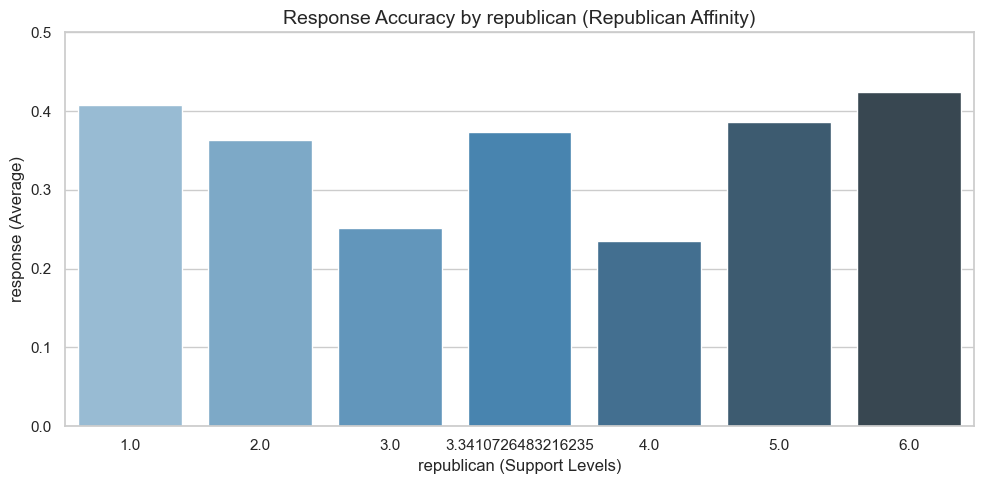

In [198]:
plt.figure(figsize=(10, 5))
sns.barplot(data=republican_alignment, x="republican", y="response", palette="Blues_d")
plt.title("Response Accuracy by republican (Republican Affinity)")
plt.xlabel("republican (Support Levels)")
plt.ylabel("response (Average)")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\3186088830.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="republican", y="response", hue="wave", ci=None, palette="Set2")


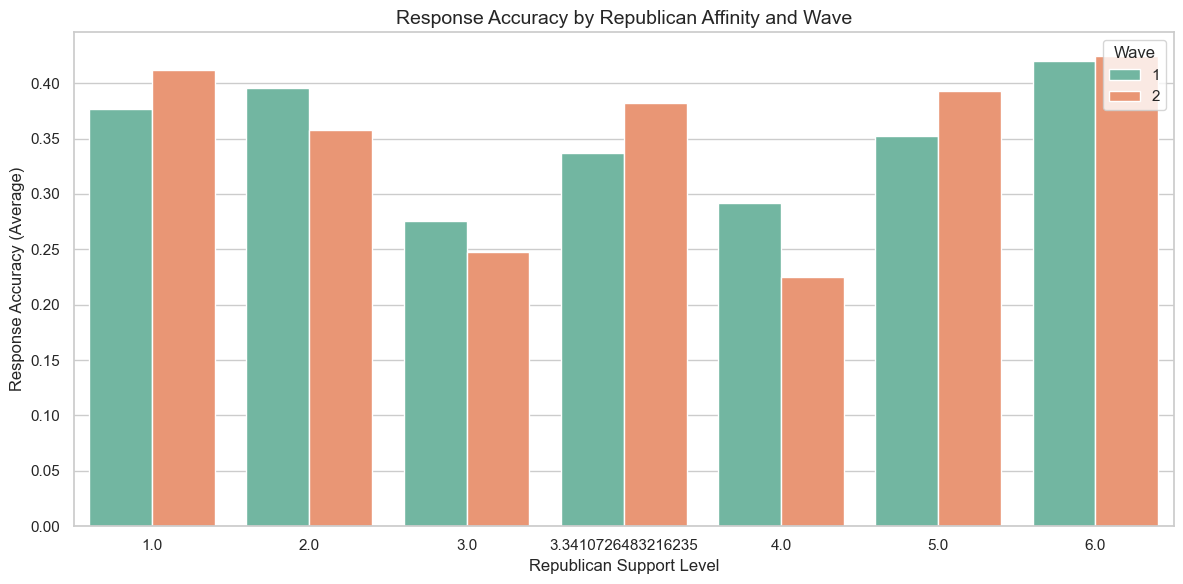

In [219]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="republican", y="response", hue="wave", ci=None, palette="Set2")
plt.title("Response Accuracy by Republican Affinity and Wave")
plt.xlabel("Republican Support Level")
plt.ylabel("Response Accuracy (Average)")
plt.legend(title="Wave")
plt.tight_layout()
plt.show()

### Statistical description of digital literacy by response

In [199]:
diglitagg_by_response = df.groupby("response")["diglitagg"].describe()
diglitagg_by_response

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
0,119563.0,0.047761,0.983878,-2.80485,-0.600590,-1.348017e-16,0.674654,2.978026
1,62905.0,-0.090780,0.862714,-2.80485,-0.657415,-1.348017e-16,0.398462,2.978026


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\2197586614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="response", y="diglitagg", palette="coolwarm")


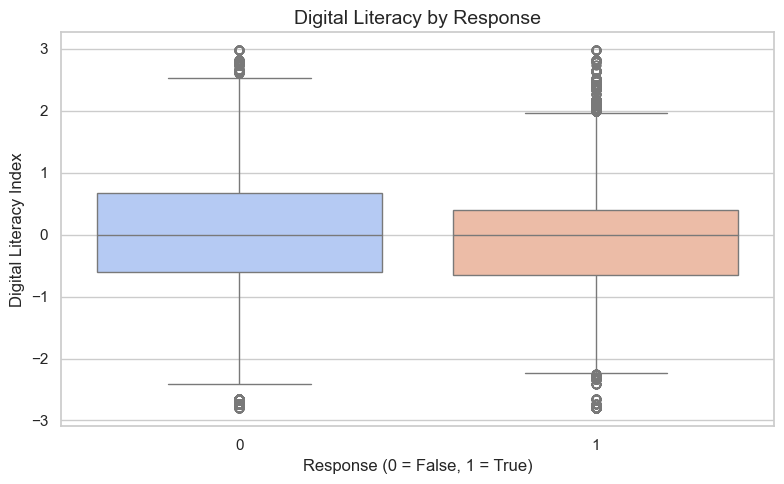

In [200]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="response", y="diglitagg", palette="coolwarm")
plt.title("Digital Literacy by Response")
plt.xlabel("Response (0 = False, 1 = True)")
plt.ylabel("Digital Literacy Index")
plt.tight_layout()
plt.show()

### Accuracy of responses according to experimental conditions

In [201]:
condition_accuracy = df.groupby("Condition")["response"].mean().reset_index()
condition_accuracy

,Condition,response
0,1,0.401450
1,2,0.369099
2,3,0.310225
3,4,0.344715


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\61909330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=condition_accuracy, x="Condition", y="response", palette="Purples_d")


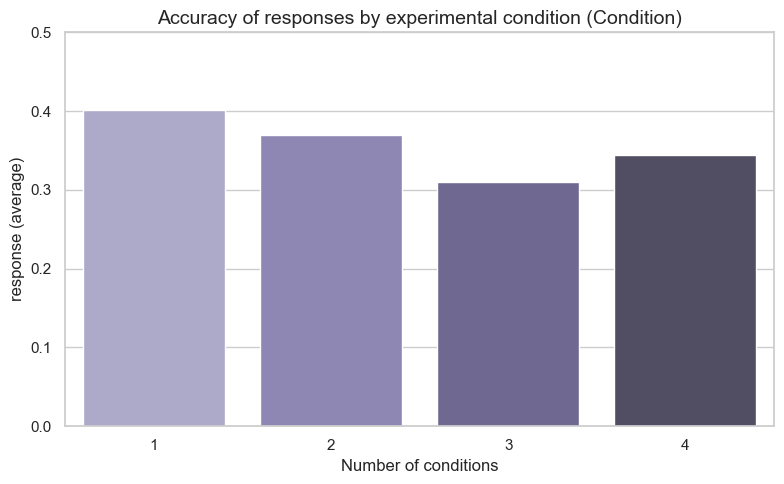

In [202]:
plt.figure(figsize=(8, 5))
sns.barplot(data=condition_accuracy, x="Condition", y="response", palette="Purples_d")
plt.title("Accuracy of responses by experimental condition (Condition)")
plt.xlabel("Number of conditions")
plt.ylabel("response (average)")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

## Conclusions:
1. The effect of type of involvement on accuracy in detecting truth/falsehood:
- Participants in the Accuracy condition (in which they were asked to judge the truthfulness of the post) were better at identifying true content than those who were asked to share, give a Lime, or write a comment.
- This directly supports the article's claim: the very focus on social media considerations impairs judgment about credibility.
2. The effect of political orientation:
- Non-linear right-left truth/falsehood detection — strong ideological involvement may produce higher awareness or coordination with content positions.
3. Republican affiliation:
- Truth detection may be affected by the fit between content and an existing political position.
4. Digital literacy:
- No sharp difference was observed between the responses, but there is a wide dispersion and slightly higher indices in group 1 (the correct one).
- Digital literacy contributes to correct identification, but does not necessarily guarantee it, there may be additional mediating variables.
5. The effect of experimental conditions:
- Condition 1 presented the highest correct response rate.
- Conditions 3 and 4 presented the lowest performance.
- There is a clear effect of the instruction received by the participants on the ability to distinguish truth.

### Interaction between engagement type (engagement_type) and digital literacy level (diglitagg)

In [203]:
df["diglit_group"] = pd.qcut(df["diglitagg"], q=3, labels=["low", "medium", "high"])

engage_diglit = (
    df.groupby(["engagement_type", "diglit_group"])["response"]
    .mean()
    .reset_index()
    .rename(columns={"response": "accuracy"})
)

engage_diglit.head()

C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\134882913.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["engagement_type", "diglit_group"])["response"]


,engagement_type,diglit_group,accuracy
0,Accuracy,low,0.415010
1,Accuracy,medium,0.422024
2,Accuracy,high,0.357360
3,Commenting,low,0.345377
4,Commenting,medium,0.378689


### Cross-referencing the type of engagement with the item's veracity

In [204]:
engage_veracity = (
    df.groupby(["engagement_type", "veracity"])["response"]
    .mean()
    .reset_index()
    .rename(columns={"response": "accuracy"})
)

engage_veracity.head()


,engagement_type,veracity,accuracy
0,Accuracy,0,0.285662
1,Accuracy,1,0.523315
2,Commenting,0,0.317398
3,Commenting,1,0.349097
4,Liking,0,0.288572


### Analysis by age groups and their impact on the correct response rate (response = 1)

In [205]:
df["age_group"] = pd.cut(df["age"], bins=[0, 30, 50, df["age"].max()],
                    labels=["Young (≤30)", "Middle (31-50)", "Older (>50)"])

age_accuracy = (
    df.groupby("age_group")["response"]
    .mean()
    .reset_index()
    .rename(columns={"response": "accuracy"})
)

age_accuracy.head()


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\3504405698.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["response"]


,age_group,accuracy
0,Young (≤30),0.384253
1,Middle (31-50),0.438652
2,Older (>50),0.221262


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\1555294061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_accuracy, x="age_group", y="accuracy", palette="Set2")


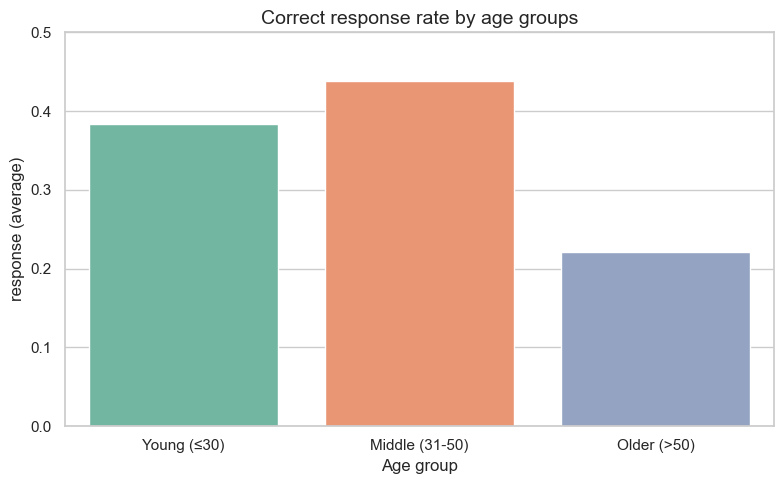

In [206]:
plt.figure(figsize=(8, 5))
sns.barplot(data=age_accuracy, x="age_group", y="accuracy", palette="Set2")
plt.title("Correct response rate by age groups")
plt.xlabel("Age group")
plt.ylabel("response (average)")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()


### The effect of gender on accuracy in truth detection

C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\838357549.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_accuracy, x="gender_label", y="accuracy", palette="pastel")


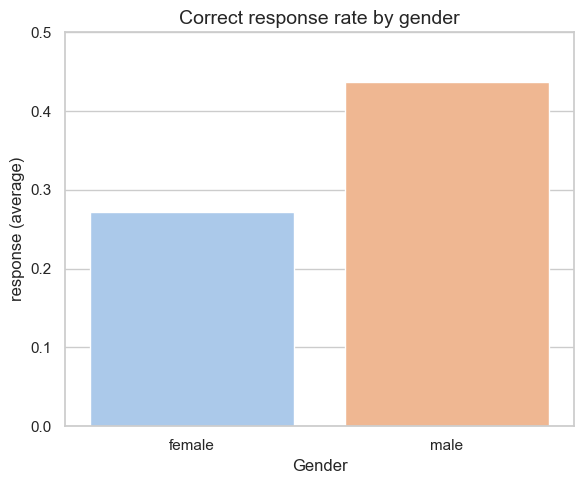

In [207]:
gender_map = {1: "male", 2: "female"}
df["gender_label"] = df["gender"].map(gender_map)

gender_accuracy = (
    df.groupby("gender_label")["response"]
    .mean()
    .reset_index()
    .rename(columns={"response": "accuracy"})
)

plt.figure(figsize=(6, 5))
sns.barplot(data=gender_accuracy, x="gender_label", y="accuracy", palette="pastel")
plt.title("Correct response rate by gender")
plt.xlabel("Gender")
plt.ylabel("response (average)")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

### The 10 most confusing posts - the ones that participants failed to correctly identify the most

In [208]:
item_accuracy = (
    df.groupby("item")["response"]
    .mean()
    .reset_index()
    .rename(columns={"response": "accuracy"})
    .sort_values(by="accuracy")
)

item_accuracy.head(10)

,item,accuracy
64,w1_55,0.175614
65,w1_56,0.200183
72,w1_63,0.213129
63,w1_54,0.222723
67,w1_58,0.250686
62,w1_53,0.251361
69,w1_60,0.257798
61,w1_52,0.259259
71,w1_62,0.259361
73,w1_64,0.260791


### Relationship between education, digital literacy and response

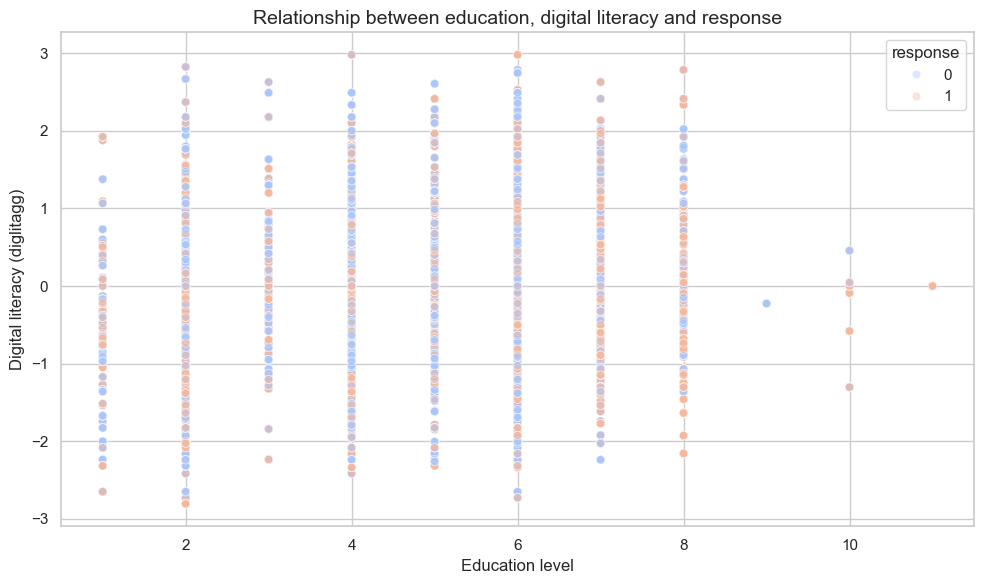

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="education", y="diglitagg", hue="response", alpha=0.4, palette="coolwarm")
plt.title("Relationship between education, digital literacy and response")
plt.xlabel("Education level")
plt.ylabel("Digital literacy (diglitagg)")
plt.legend(title="response")
plt.tight_layout()
plt.show()

# Building a logistic model for predicting response

In [210]:
# Encode engagement_type to numeric values
df["engagement_code"] = LabelEncoder().fit_transform(df["engagement_type"])

features = ["engagement_code", "veracity", "age", "education", "diglitagg", "DemRep_C"]
X = df[features]
X = sm.add_constant(X)

y = df["response"]

logit_model = sm.Logit(y, X).fit()

logit_summary = logit_model.summary2().tables[1]
logit_summary


Optimization terminated successfully.
         Current function value: 0.610482
         Iterations 5


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.538564,0.021829,-24.671992,2.137655e-134,-0.581348,-0.495780
engagement_code,-0.114390,0.004329,-26.426924,6.721664e-154,-0.122873,-0.105906
veracity,0.455447,0.010209,44.614483,0.000000e+00,0.435439,0.475455
age,-0.022684,0.000314,-72.280326,0.000000e+00,-0.023299,-0.022069
education,0.157265,0.002615,60.142253,0.000000e+00,0.152140,0.162390
diglitagg,-0.184795,0.005534,-33.395535,1.591651e-244,-0.195641,-0.173950
DemRep_C,0.018923,0.003139,6.027608,1.664035e-09,0.012770,0.025076


#### Conclusions from the model output:
- Strong cognitive/social effects: The way in which the content is presented (sharing, liking, etc.) has a greater impact than the truth of the content.
- More digital literacy does not necessarily help, and sometimes reduces accuracy.
- Education still matters, and there is a very consistent and significant effect.

## Model Evaluate

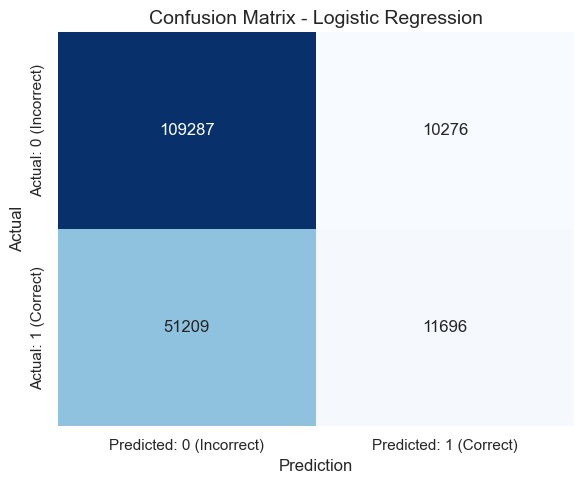

In [211]:
# Predicting probabilities
y_pred_prob = logit_model.predict(X)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)


# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Predicted: 0 (Incorrect)", "Predicted: 1 (Correct)"],
            yticklabels=["Actual: 0 (Incorrect)", "Actual: 1 (Correct)"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [212]:
class_report = classification_report(y, y_pred_binary, output_dict=True)
class_report

{'0': {'precision': 0.6809328581397667,
  'recall': 0.9140536788136798,
  'f1-score': 0.7804569751373818,
  'support': 119563.0},
 '1': {'precision': 0.532313853995995,
  'recall': 0.18593116604403465,
  'f1-score': 0.2755988076864168,
  'support': 62905.0},
 'accuracy': 0.6630368064537343,
 'macro avg': {'precision': 0.6066233560678809,
  'recall': 0.5499924224288573,
  'f1-score': 0.5280278914118993,
  'support': 182468.0},
 'weighted avg': {'precision': 0.6296971430792412,
  'recall': 0.6630368064537343,
  'f1-score': 0.6064094543474189,
  'support': 182468.0}}

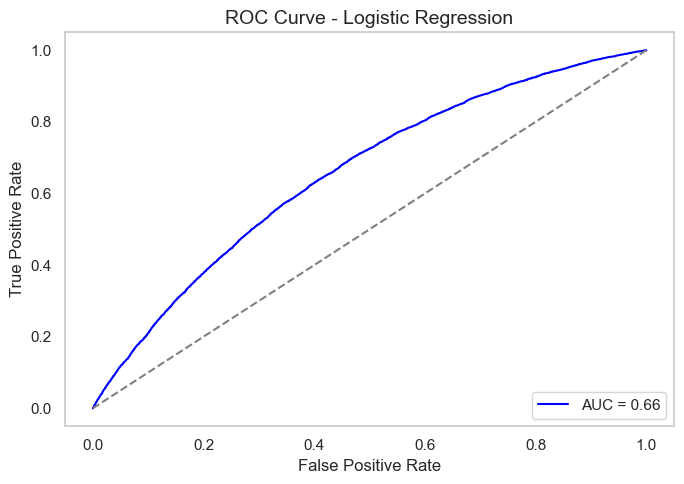

In [213]:
#1. AUC calculation
auc = roc_auc_score(y, y_pred_prob)

# 2. ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Decision Tree

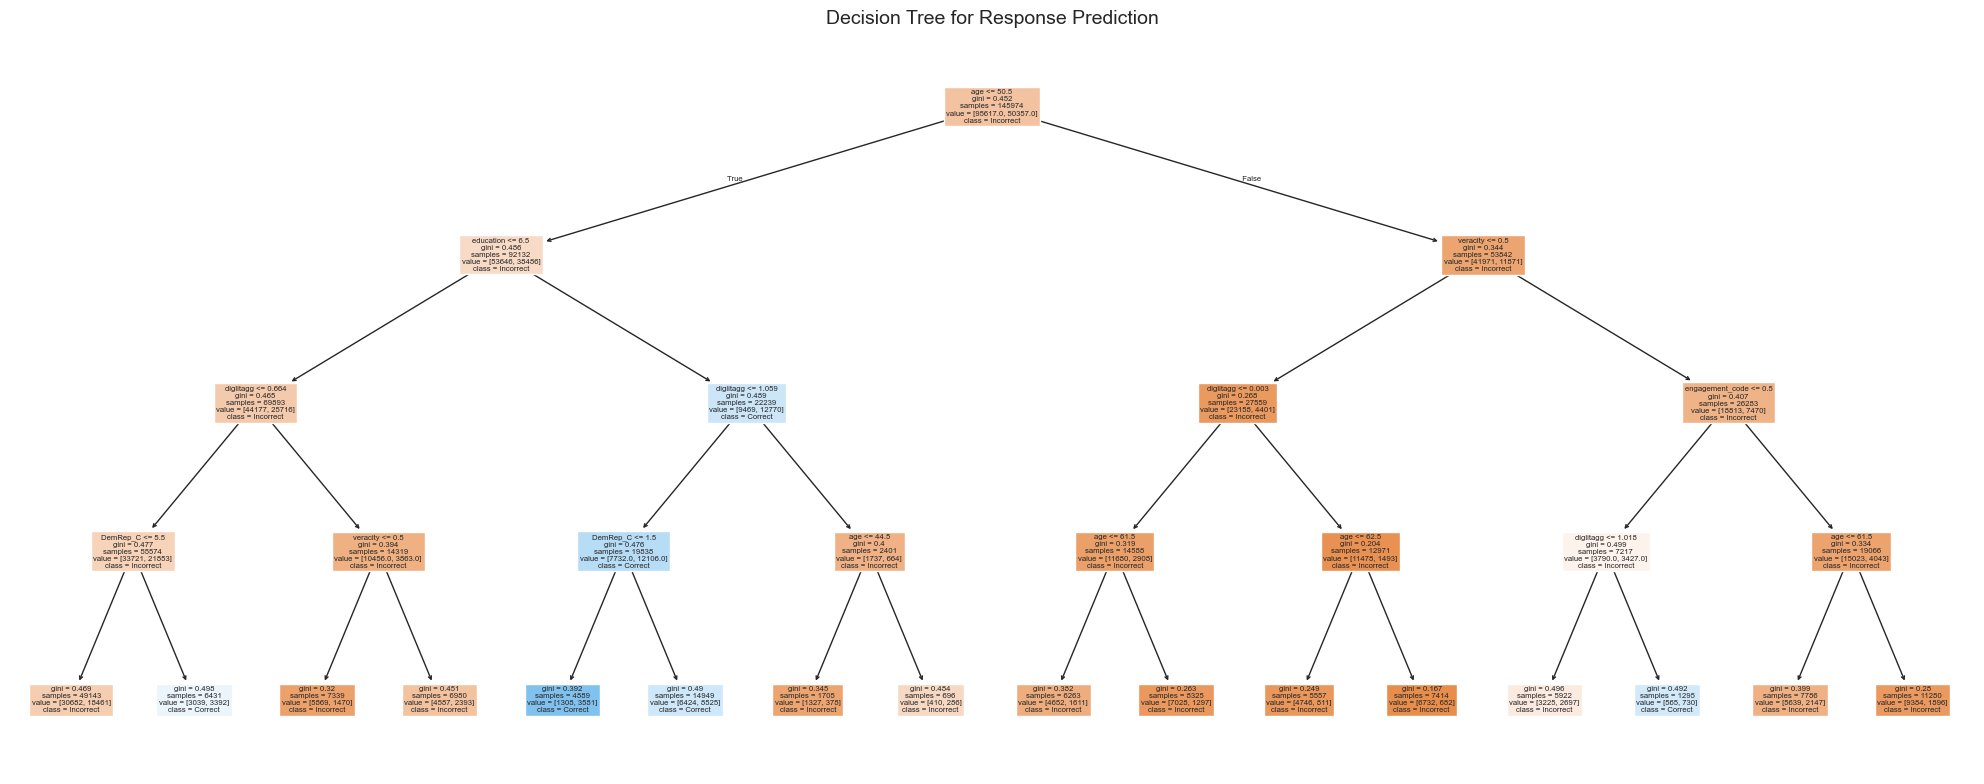

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("const", axis=1), y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(tree_model, feature_names=X_train.columns, class_names=["Incorrect", "Correct"], filled=True)
plt.title("Decision Tree for Response Prediction")
plt.tight_layout()
plt.show()


In [215]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": tree_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.reset_index(drop=True, inplace=True)
feature_importance

,Feature,Importance
0,age,0.411090
1,education,0.205050
2,diglitagg,0.135147
3,engagement_code,0.103272
4,veracity,0.080339
5,DemRep_C,0.065102


C:\Users\shlomias\AppData\Local\Temp\ipykernel_27744\1444712479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=feature_importance, x='Feature', y='Percentage', palette='viridis')


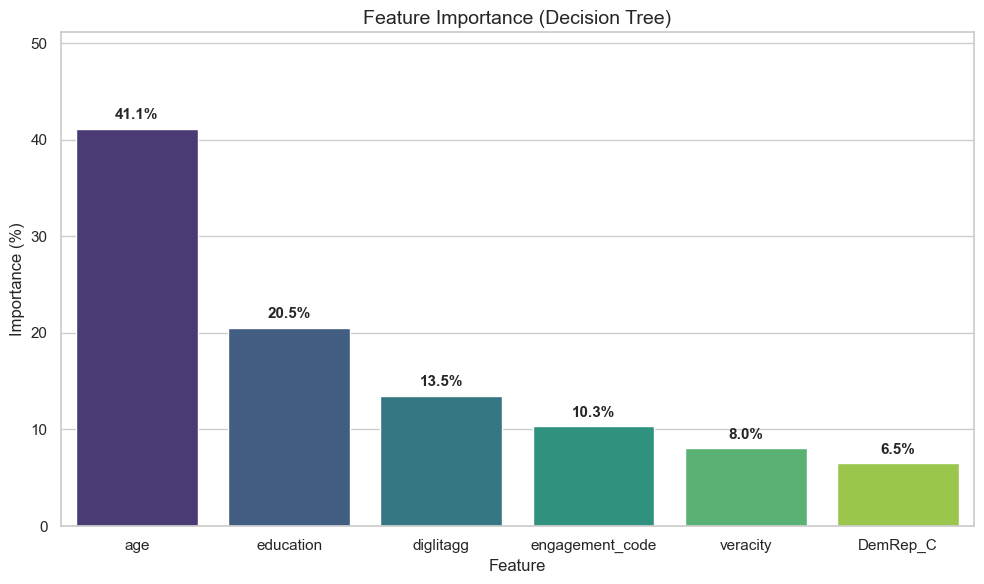

In [220]:
feature_importance = pd.DataFrame({
    'Feature': ['age', 'education', 'diglitagg', 'engagement_code', 'veracity', 'DemRep_C'],
    'Importance': [0.411090, 0.205050, 0.135147, 0.103272, 0.080339, 0.065102]
})

feature_importance['Percentage'] = feature_importance['Importance'] * 100

plt.figure(figsize=(10, 6))
bars = sns.barplot(data=feature_importance, x='Feature', y='Percentage', palette='viridis')

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{bar.get_height():.1f}%",
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.title("Feature Importance (Decision Tree)")
plt.ylabel("Importance (%)")
plt.xlabel("Feature")
plt.ylim(0, max(feature_importance['Percentage']) + 10)
plt.tight_layout()
plt.show()


#### Conclusions:
- Age is a very dominant factor: a relatively simple model already differentiates well using it.
- Education is still important but digital literacy contributes less, perhaps even confusedly (as we saw in Logisti).
- Context (engagement) is also significant in shaping the willingness to examine information.

# Random Forest

In [216]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

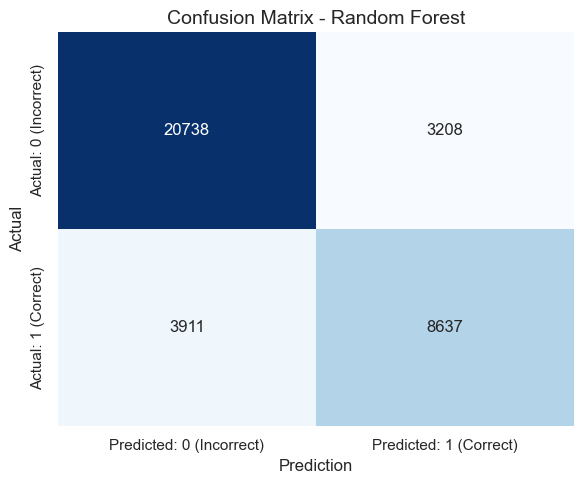

In [217]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Predicted: 0 (Incorrect)", "Predicted: 1 (Correct)"],
            yticklabels=["Actual: 0 (Incorrect)", "Actual: 1 (Correct)"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

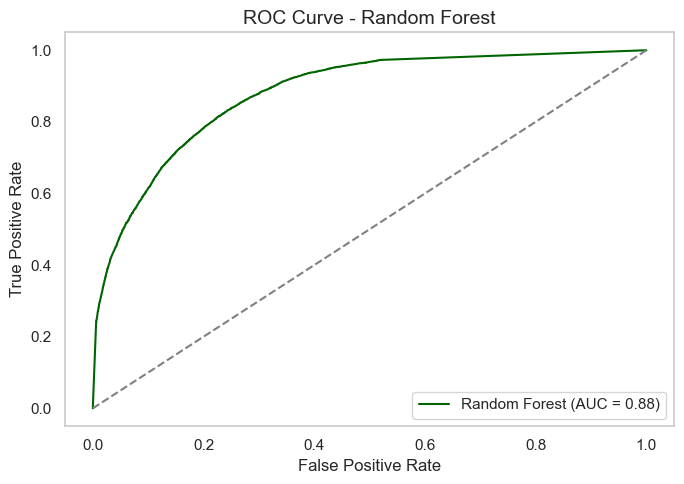

In [218]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color="darkgreen")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()